In [17]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [18]:
plt.style.use('default')
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

In [19]:
workpath = os.getcwd()
dbpath = '/home/idies/workspace/lsst_cadence/FBS_1.5/'
# dbpath = '/home/idies/workspace/lsst_cadence/FBS_1.4/'

In [20]:
# get the name of all opsim dbs 
import glob

os.chdir(dbpath)  # change to opsim database directory
dblist_all = glob.glob('*.db') 
# workpath = '/home/idies/workspace/Storage/lixl/persistent/LSST_OpSim/unknowns'
os.chdir(workpath) # change back to work directory
dblist_all.sort()


In [ ]:
dblist_all

In [22]:
#  get columns from databases
def get_cols(dbfile, cols='night', lim=None):
    """
    cols = 'night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note'
    connect to database
    Returns: a pandas DataFrame
    
    Examples:
    
    cols = 'night, observationStartMJD, fieldRA, filter, fieldDec, proposalId, note, '

    df = get_cols(dbfile=dbpath + db, cols=cols, lim='night<300')
   
    """
    import sqlite3
    import pandas as pd
    connection = sqlite3.connect(dbfile)
    cursor = connection.cursor()
    
    if lim!=None:
        sqlstr = "SELECT {} FROM SummaryAllProps where {}".format(cols, lim)
    else:
        sqlstr = "SELECT {} FROM SummaryAllProps".format(cols)

    print('connect to ', dbfile, '\n', sqlstr)
    cursor.execute(sqlstr)
    data = cursor.fetchall()
    
    # convert data to dataframe
    data_df = pd.DataFrame(data, columns=cols.split(', '))
    
    # close connection
    connection.close()
    
    return data_df


### WFD

In [30]:
%%time
# calculate the FoM of depth
# 1 - (peak - mag_stretch)
#sqlstr = 'proposalId=1'
sqlstr = "note not like '%DD%'"

mag_stretch = {'u':24.0, 'g':25.1, 'r':24.8, 'i':24.1, 'z':23.4, 'y':22.2 }
bins = np.arange(18, 27, 0.01)

dicFoM = {}

filters = ['u', 'g', 'r', 'i', 'z', 'y']
for i, dbname in enumerate( dblist_all):
    df_opsim = get_cols(dbfile=dbpath+dbname,
                   cols='filter, fiveSigmaDepth, night', lim=sqlstr)
    dicFoM[dbname] = {}
    for f in filters:
        m5 = df_opsim [df_opsim['filter']==f]['fiveSigmaDepth'].values
        # method to calculate figure of merit of depth from fiveSigmaDepth
        #values, bins, = np.histogram(m5, bins=bins) 
        #mode = bins[ np.argmax(values) ]
        # 
        mode = np.median(m5)
        
        #FoM =  mode - mag_stretch[f]
        FoM = mode
        #FoM = np.mean(m5)
        
        dicFoM[dbname][f] = FoM
        print(dbname, f, FoM)

        
df = pd.DataFrame( dicFoM ).T
df = df.reset_index()
df = df.rename(columns = {'index':'db'})
df.to_csv('data_v1_5/df_depth_all.csv', index=False)



connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/agnddf_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
agnddf_v1.5_10yrs.db u 23.564162226731685
agnddf_v1.5_10yrs.db g 24.50419083540723
agnddf_v1.5_10yrs.db r 24.02906014218654
agnddf_v1.5_10yrs.db i 23.43907063960707
agnddf_v1.5_10yrs.db z 22.77125388756199
agnddf_v1.5_10yrs.db y 22.01571013879886
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/alt_dust_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
alt_dust_v1.5_10yrs.db u 23.532348580121496
alt_dust_v1.5_10yrs.db g 24.451163091719557
alt_dust_v1.5_10yrs.db r 23.970910360725668
alt_dust_v1.5_10yrs.db i 23.36650286084881
alt_dust_v1.5_10yrs.db z 22.711690932287773
alt_dust_v1.5_10yrs.db y 21.96722415593132
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where 

dcr_nham2_ugr_v1.5_10yrs.db g 24.339292800539624
dcr_nham2_ugr_v1.5_10yrs.db r 23.923063255336757
dcr_nham2_ugr_v1.5_10yrs.db i 23.408008960946386
dcr_nham2_ugr_v1.5_10yrs.db z 22.776342233833255
dcr_nham2_ugr_v1.5_10yrs.db y 22.009218793595974
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/dcr_nham2_ugri_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
dcr_nham2_ugri_v1.5_10yrs.db u 23.367244315632718
dcr_nham2_ugri_v1.5_10yrs.db g 24.34642326550285
dcr_nham2_ugri_v1.5_10yrs.db r 23.929726247066583
dcr_nham2_ugri_v1.5_10yrs.db i 23.31487729862834
dcr_nham2_ugri_v1.5_10yrs.db z 22.761232271610005
dcr_nham2_ugri_v1.5_10yrs.db y 22.014397772379215
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/descddf_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
descddf_v1.5_10yrs.db u 23.57379330845986
descddf_v1.5_10yrs.db g 24.505805931069027
descddf_v1.5_10yrs.db r 24.0243048332

footprint_gp_smoothv1.5_10yrs.db u 23.564902429924512
footprint_gp_smoothv1.5_10yrs.db g 24.507773682868986
footprint_gp_smoothv1.5_10yrs.db r 24.023077174625044
footprint_gp_smoothv1.5_10yrs.db i 23.42470367499363
footprint_gp_smoothv1.5_10yrs.db z 22.773834357204944
footprint_gp_smoothv1.5_10yrs.db y 22.013209662838694
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/footprint_newAv1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
footprint_newAv1.5_10yrs.db u 23.494346686092513
footprint_newAv1.5_10yrs.db g 24.457513787185853
footprint_newAv1.5_10yrs.db r 23.99099919257732
footprint_newAv1.5_10yrs.db i 23.40066140590089
footprint_newAv1.5_10yrs.db z 22.757058227537385
footprint_newAv1.5_10yrs.db y 21.96665761851431
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/footprint_newBv1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
footprint_newBv1.5_10yrs.db u 23.4722342579614

rolling_mod6_sdf_0.10_v1.5_10yrs.db u 23.545564689315135
rolling_mod6_sdf_0.10_v1.5_10yrs.db g 24.450502319503762
rolling_mod6_sdf_0.10_v1.5_10yrs.db r 23.897286091910928
rolling_mod6_sdf_0.10_v1.5_10yrs.db i 23.276030253113554
rolling_mod6_sdf_0.10_v1.5_10yrs.db z 22.66603918009936
rolling_mod6_sdf_0.10_v1.5_10yrs.db y 21.927197203258622
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/rolling_mod6_sdf_0.20_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
rolling_mod6_sdf_0.20_v1.5_10yrs.db u 23.544955798473683
rolling_mod6_sdf_0.20_v1.5_10yrs.db g 24.460974603689486
rolling_mod6_sdf_0.20_v1.5_10yrs.db r 23.906781997308354
rolling_mod6_sdf_0.20_v1.5_10yrs.db i 23.294107144321202
rolling_mod6_sdf_0.20_v1.5_10yrs.db z 22.67416804183315
rolling_mod6_sdf_0.20_v1.5_10yrs.db y 21.9350671818151
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/short_exp_2ns_1expt_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAl

u60_v1.5_10yrs.db r 24.03315705113415
u60_v1.5_10yrs.db i 23.408884723857486
u60_v1.5_10yrs.db z 22.767244058321538
u60_v1.5_10yrs.db y 22.00964179548061
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/var_expt_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
var_expt_v1.5_10yrs.db u 23.28314704972935
var_expt_v1.5_10yrs.db g 24.416490021106917
var_expt_v1.5_10yrs.db r 23.98347626721564
var_expt_v1.5_10yrs.db i 23.482131840160825
var_expt_v1.5_10yrs.db z 22.848653605892338
var_expt_v1.5_10yrs.db y 21.96451045108172
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/wfd_depth_scale0.65_noddf_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
wfd_depth_scale0.65_noddf_v1.5_10yrs.db u 23.54394080845351
wfd_depth_scale0.65_noddf_v1.5_10yrs.db g 24.45388339838038
wfd_depth_scale0.65_noddf_v1.5_10yrs.db r 23.966407095842722
wfd_depth_scale0.65_noddf_v1.5_10yrs.db i 23.361991925127

wfd_depth_scale0.99_noddf_v1.5_10yrs.db r 24.051834970671216
wfd_depth_scale0.99_noddf_v1.5_10yrs.db i 23.4741307638761
wfd_depth_scale0.99_noddf_v1.5_10yrs.db z 22.801995667574957
wfd_depth_scale0.99_noddf_v1.5_10yrs.db y 22.027358060679035
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/wfd_depth_scale0.99_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
wfd_depth_scale0.99_v1.5_10yrs.db u 23.58228202282874
wfd_depth_scale0.99_v1.5_10yrs.db g 24.531865122268286
wfd_depth_scale0.99_v1.5_10yrs.db r 24.042736303880236
wfd_depth_scale0.99_v1.5_10yrs.db i 23.45520265640977
wfd_depth_scale0.99_v1.5_10yrs.db z 22.797890679913998
wfd_depth_scale0.99_v1.5_10yrs.db y 22.0179239026438
CPU times: user 11min 43s, sys: 4min 39s, total: 16min 23s
Wall time: 16min 42s


In [28]:
df.head()

,db,g,i,r,u,y,z
0,agnddf_v1.5_10yrs.db,24.553978,23.479031,24.063816,23.596547,22.030345,22.802753
1,alt_dust_v1.5_10yrs.db,24.514701,23.418631,24.009913,23.552837,21.973124,22.746577
2,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db,24.494271,23.352120,23.953845,23.547949,21.930217,22.699220
3,baseline_2snaps_v1.5_10yrs.db,24.486042,23.446335,24.023830,23.409902,22.021757,22.791512
4,baseline_samefilt_v1.5_10yrs.db,24.510252,23.481499,24.008973,23.610257,22.014227,22.745702


In [35]:

def plot_maghist(df_list, label_list, var='fiveSigmaDepth', 
                 ylim=[0, 65000], yticks=[], savefig=None):

    
  
    """plot histogram for each filter"""
    bins = np.arange(18, 27, 0.1)
    xs = (bins[:-1] + bins[1:]) * 0.5
    bright = xs < 21
    faint = xs >= 21
    fig, axs = plt.subplots(6, 1, figsize=(6, 15), 
                            sharex='col', sharey='row',
                            gridspec_kw={'hspace': 0, 'wspace': 0}); 

    axs = axs.flatten()
    FILTERS = ['u', 'g', 'r', 'i', 'z', 'y']

    mag_min = {'u':23.4, 'g':24.6, 'r':24.3, 'i':23.6, 'z':22.9, 'y':21.7 }
    mag_stretch = {'u':24.0, 'g':25.1, 'r':24.8, 'i':24.1, 'z':23.4, 'y':22.2 }
    mag_goal = {'u':23.9, 'g':25.0, 'r': 24.7, 'i': 24.0, 'z': 23.3, 'y': 22.1}
    
    cmap = plt.cm.get_cmap('plasma')
    colors = [cmap(i) for i in np.linspace(0, 1, len(df_list)+1)][:len(df_list)]
    for i, f in enumerate(FILTERS):
        ax = axs[i]
        print (f)
        for k in range(2):
            #plotting the edges and the inside of the bins separately
            data_stacked = np.array([df[df['filter']==f][var].values for df in df_list])
            if k:
                #edges
                _tmp = ax.hist(data_stacked, histtype='step', 
                               stacked=False, linewidth=2, label=label_list, 
                                bins=bins, alpha=0.65, color=colors);
                dist = {}
                for l,lab in enumerate(label_list):
                    dist[lab] = _tmp[0][l]
                    
                    print(f, lab)
                    peaks = xs[bright][np.where(dist[lab][bright] == 
                                                      dist[lab][bright].max())[0]]
                    if len(peaks) <= 2:
                        print("\t bright", peaks, dist[lab][bright].max())
                    peaks = xs[faint][np.where(dist[lab][faint] == 
                                                       dist[lab][faint].max())[0]]
                    if len(peaks) <= 2:
                        print("\t faint", peaks, dist[lab][faint].max())
                '''print(f, "lowM", xs[lowm][np.where(dist[lowm] == dist[lowm].max())[0]], 
                      dist[lowm].max())
                print(f, "highM", xs[highm][np.where(dist[highm] == dist[highm].max())[0]], 
                      dist[highm].max())
                      '''
            else:
                #filled bins
                ax.hist(data_stacked[0],  
                        stacked=False, linewidth=2, #edgewidth=2,
                        bins=bins, histtype="stepfilled", 
                        label=None, color=colors[0],  alpha=0.2);
 
        ax.set_xlabel('fiveSigmaDepth', fontsize=18)
        ax.set_ylabel('Nv (k)', fontsize=18)
        ax.set_title(f, position=(0.95, 0.7), fontsize=18)
        ax.set_xlim([19, 26])
      
        ax.set_xticks(np.arange(19, 26, 1))
        ax.set_xticklabels(labels=["%i"%k for k in np.arange(19, 26, 1)],
                     fontsize=18)
        
        ax.set_ylim(ylim)
        ax.set_yticks(yticks)
        

        
        ax.set_yticklabels(labels=["%i"%(k/10000) for k in yticks],
                      fontsize=18)
        ax.yaxis.get_offset_text().set_visible(False)
        
        # fill mag from science require document
        y = np.linspace(0, ylim[1])
        ax.fill_betweenx(y, mag_min[f], mag_stretch[f], 
                         color='gray', alpha=0.2)
        ax.axvline(mag_goal[f],color='k') 
        
    # add shared legend for all subplots 
    lines = []
    labels = []
    
    for ax in fig.axes[:1]:
        axLine, axLabel = ax.get_legend_handles_labels()
        lines.extend(axLine)
        labels.extend(axLabel)
        ax.set_ylim(ylim)
    fig.legend(lines, labels,           
               loc = 'upper left', bbox_to_anchor=(0.1, 0.95))
        
    fig.tight_layout()
    if savefig!=None:
        plt.savefig(savefig, bbox_inches='tight')



In [26]:
dblist_all[5]

'baseline_v1.5_10yrs.db'

In [27]:
df_base = get_cols(dbfile=dbpath+'baseline_v1.5_10yrs.db', 
                   cols='filter, fiveSigmaDepth, night', 
                   lim='proposalId=1')
df_short = get_cols(dbfile=dbpath+'short_exp_2ns_1expt_v1.5_10yrs.db',
                    cols='filter, fiveSigmaDepth, night', 
                   lim='proposalId=1')
df_twilight = get_cols(dbfile=dbpath+'twilight_neo_mod1_v1.5_10yrs.db',
                    cols='filter, fiveSigmaDepth, night', 
                   lim='proposalId=1') 


connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/baseline_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/short_exp_2ns_1expt_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/twilight_neo_mod1_v1.5_10yrs.db 
 SELECT filter, fiveSigmaDepth, night FROM SummaryAllProps where proposalId=1


u
u baseline
	 faint [23.65] 15793.0
u short_2ns
	 bright [20.45] 5410.0
	 faint [23.65] 12452.0
u twilight_neo
	 bright [20.95] 3.0
	 faint [23.65] 15655.0
g
g baseline
	 faint [24.65] 22191.0
g short_2ns
	 bright [20.95] 235.0
	 faint [24.65] 19498.0
g twilight_neo
	 faint [24.65] 25773.0
r
r baseline
	 faint [24.15] 51809.0
r short_2ns
	 bright [20.95] 928.0
	 faint [24.15] 53990.0
r twilight_neo
	 bright [20.95] 17319.0
	 faint [24.15] 39531.0
i
i baseline
	 bright [20.95] 2.0
	 faint [23.65] 40743.0
i short_2ns
	 bright [20.95] 3785.0
	 faint [23.65] 43470.0
i twilight_neo
	 bright [20.85] 17616.0
	 faint [23.65] 33563.0
z
z baseline
	 bright [20.95] 20.0
	 faint [22.85] 42525.0
z short_2ns
	 bright [20.75] 5498.0
	 faint [22.85] 42436.0
z twilight_neo
	 bright [20.25] 20085.0
	 faint [22.85] 30382.0
y
y baseline
	 bright [20.95] 1150.0
	 faint [22.15] 50165.0
y short_2ns
	 bright [19.95] 5643.0
	 faint [22.05] 50169.0
y twilight_neo
	 bright [20.95] 1884.0
	 faint [22.05] 61488.0

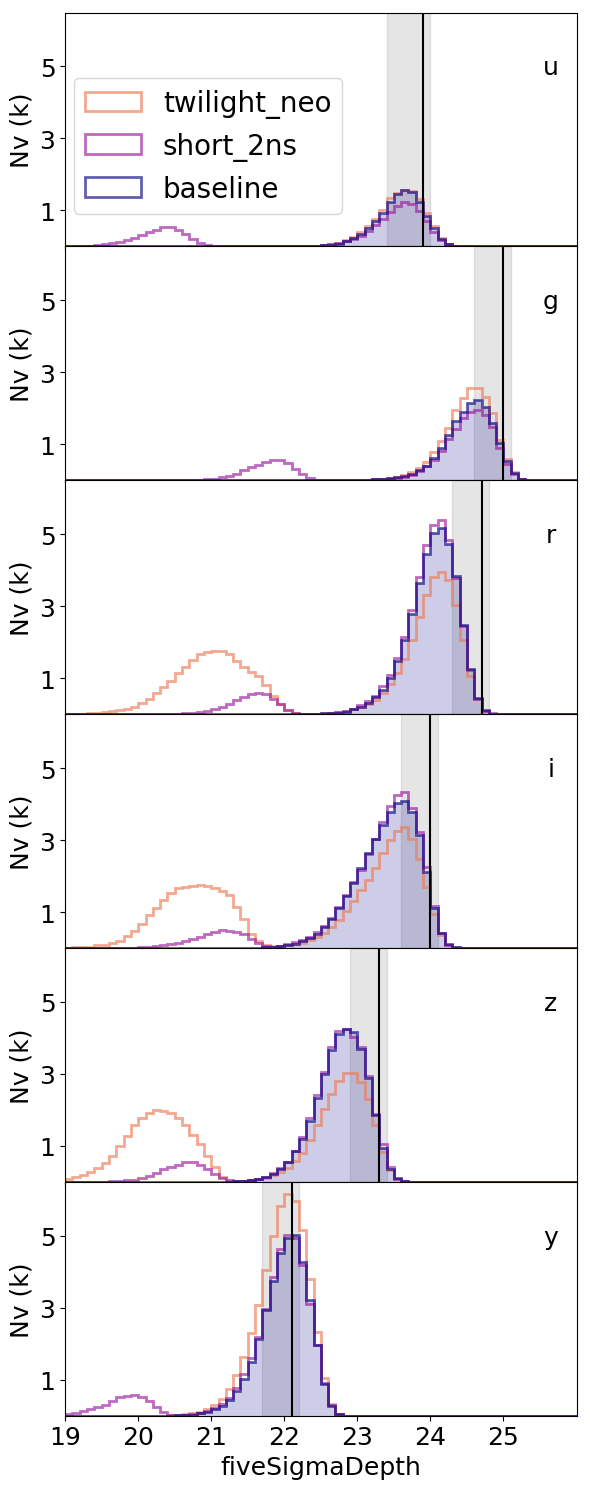

In [36]:
df_list = [df_base,  df_short, df_twilight]
label_list = ['baseline', 'short_2ns', 'twilight_neo']
plot_maghist(df_list, label_list, ylim=[0, 65000], yticks=range(10000, 60000, 20000), savefig='figures/depth_hist.pdf')

### GP

In [31]:
def get_pixId(df, nside=16):
    '''get pixId for each field'''
    pixId = RADec2pix(nside, ra=df['fieldRA'].values, dec=df['fieldDec'].values)
    df['pixId'] = pixId
    return df


def RADec2pix(nside, ra, dec, degree=True):
    """
    Calculate the nearest healpixel ID of an RA/Dec array, assuming nside.

    Parameters
    ----------
    nside : int
        The nside value of the healpix grid.
    ra : numpy.ndarray
        The RA values to be converted to healpix ids, in degree by default.
    dec : numpy.ndarray
        The Dec values to be converted to healpix ids, in degree by default.

    Returns
    -------
    numpy.ndarray
        The healpix ids.
    """
    import healpy as hp
    if degree:
        ra = np.radians(ra) # change to radians
        dec = np.radians(dec)
    
    lat = np.pi/2. - dec
    hpid = hp.ang2pix(nside, lat, ra )
    return hpid


In [32]:
ipix_LMC = [2899, 2900, 2901, 2934, 2935, 2936, 2965, 2966, 2967, 2992, 2993, 2994]
ipix_SMC = [2960, 2961, 2988, 2989, 3012]
ipix_GP = [ 144,  145,  146,  147,  179,  180,  181,  182,  183,  184,  217,
        218,  219,  225,  226,  260,  261,  271,  272,  307,  308,  320,
        321,  358,  374,  413,  431,  432,  471,  472,  493,  534,  535,
        558,  598,  599,  622,  661,  662,  687,  725,  726,  751,  788,
        789,  790,  815,  816,  852,  853,  854,  879,  915,  916,  917,
        944,  979,  980,  981, 1008, 1042, 1043, 1044, 1045, 1073, 1107,
       1108, 1109, 1136, 1170, 1171, 1172, 1201, 1234, 1235, 1236, 1237,
       1265, 1297, 1298, 1299, 1300, 1330, 1361, 1362, 1363, 1364, 1393,
       1425, 1426, 1427, 1428, 1458, 1489, 1490, 1491, 1492, 1522, 1552,
       1553, 1554, 1555, 1587, 1616, 1617, 1618, 1619, 1620, 1650, 1679,
       1680, 1681, 1682, 1683, 1715, 1744, 1745, 1746, 1747, 1779, 1807,
       1808, 1809, 1810, 1811, 1843, 1871, 1872, 1873, 1874, 1875, 1907,
       1934, 1935, 1936, 1937, 1938, 1972, 1998, 1999, 2000, 2001, 2002,
       2003, 2036, 2062, 2063, 2064, 2065, 2066, 2100, 2126, 2127, 2128,
       2129, 2130, 2164, 2189, 2190, 2191, 2192, 2193, 2194, 2229, 2253,
       2254, 2255, 2256, 2257, 2258, 2293, 2316, 2317, 2318, 2319, 2320,
       2321, 2358, 2380, 2381, 2382, 2383, 2384, 2385, 2421, 2422, 2443,
       2444, 2445, 2446, 2447, 2448, 2449, 2486, 2487, 2507, 2508, 2509,
       2510, 2511, 2512, 2513, 2550, 2551, 2570, 2571, 2572, 2573, 2574,
       2575, 2576, 2614, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2673,
       2687, 2688, 2689, 2690, 2691, 2692, 2693, 2728, 2729, 2739, 2740,
       2741, 2742, 2743, 2744, 2745, 2746, 2779, 2780, 2781, 2787, 2788,
       2789, 2790, 2791, 2792, 2793, 2794, 2826, 2827, 2828, 2829, 2830,
       2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2869, 2870,
       2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2908, 2909,
       2910, 2911, 2912, 2913, 2914, 2915, 2916, 2943, 2944, 2945, 2946,
       2947, 2948, 2974, 2975, 2976]



In [57]:
dbname = dblist_all[5]
sqlstr = None
ipix_ms = ipix_SMC


connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/baseline_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps


(5,)

In [58]:
ipix_SMC

[2960, 2961, 2988, 2989, 3012]

In [60]:
np.unique( df_opsim_ms['pixId'] )

array([2960, 2961, 2988, 2989, 3012])

In [65]:
for ms, ipix_ms in zip(["GP", "LMC", "SMC"], (ipix_GP, ipix_LMC, ipix_SMC)):
    print(ms, len(ipix_ms))


GP 291
LMC 12
SMC 5


In [34]:
%%time
# calculate the FoM of depth
# 1 - (peak - mag_stretch)
#sqlstr = "proposalId=1"
sqlstr = "note not like '%DD%'"

mag_stretch = {'u':24.0, 'g':25.1, 'r':24.8, 'i':24.1, 'z':23.4, 'y':22.2 }
bins = np.arange(18, 27, 0.01)

dicFoM = {}

filters = ['u', 'g', 'r', 'i', 'z', 'y']

#ms = "GP"
#ipix_ms = ipix_GP

for ms, ipix_ms in zip(["GP", "LMC", "SMC"], (ipix_GP, ipix_LMC, ipix_SMC)):
    for i, dbname in enumerate( dblist_all):
        df_opsim = get_cols(dbfile=dbpath+dbname,
                   cols='fieldRA, fieldDec, filter, fiveSigmaDepth, night', lim=sqlstr)
    
        df_opsim = get_pixId(df_opsim, nside=16)
    
        idx = np.isin(df_opsim['pixId'].values, ipix_ms)

        df_opsim_ms = df_opsim[idx]

        print( ms, len(ipix_ms), dbname, np.unique( df_opsim_ms['pixId'] ).shape )
        
        dicFoM[dbname] = {}
        for f in filters:
            
            m5 = df_opsim_ms [df_opsim_ms['filter']==f]['fiveSigmaDepth'].values
            # method to calculate figure of merit of depth from fiveSigmaDepth
            #values, bins, = np.histogram(m5, bins=bins) 
            #mode = bins[ np.argmax(values) ]
            # 
            
            mode = np.median(m5)
            
            #FoM =  mode - mag_stretch[f]
            FoM = mode
            #FoM = np.mean(m5)
            
            dicFoM[dbname][f] = FoM
            print(dbname, len(m5), f, FoM)
    
    df = pd.DataFrame( dicFoM ).T
    df = df.reset_index()
    df = df.rename(columns = {'index':'db'})
    df.to_csv('data_v1_5/df_depth_{}_all.csv'.format(ms), index=False)
    

connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/agnddf_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
GP 291 agnddf_v1.5_10yrs.db (254,)
agnddf_v1.5_10yrs.db 14968 u 23.468845162221495
agnddf_v1.5_10yrs.db 20478 g 24.42788452006662
agnddf_v1.5_10yrs.db 35399 r 23.982907818643657
agnddf_v1.5_10yrs.db 35465 i 23.384127700295085
agnddf_v1.5_10yrs.db 32484 z 22.74543240349455
agnddf_v1.5_10yrs.db 34665 y 21.979146824621566
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/alt_dust_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
GP 291 alt_dust_v1.5_10yrs.db (252,)
alt_dust_v1.5_10yrs.db 11774 u 23.448023898791945
alt_dust_v1.5_10yrs.db 15579 g 24.368164553203588
alt_dust_v1.5_10yrs.db 24117 r 23.888368259954664
alt_dust_v1.5_10yrs.db 24734 i 23.27207418436977
alt_dust_v1.5_10yrs.db 23183 z 22.673618394309734
alt_dust_v1.5_10yrs.db 2502

GP 291 dcr_nham1_ugri_v1.5_10yrs.db (254,)
dcr_nham1_ugri_v1.5_10yrs.db 15314 u 23.374751700326826
dcr_nham1_ugri_v1.5_10yrs.db 20399 g 24.352510520439935
dcr_nham1_ugri_v1.5_10yrs.db 35449 r 23.94731640303973
dcr_nham1_ugri_v1.5_10yrs.db 35559 i 23.324014538466262
dcr_nham1_ugri_v1.5_10yrs.db 32380 z 22.733409623649273
dcr_nham1_ugri_v1.5_10yrs.db 34701 y 21.967567633942778
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/dcr_nham2_ug_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
GP 291 dcr_nham2_ug_v1.5_10yrs.db (254,)
dcr_nham2_ug_v1.5_10yrs.db 15409 u 23.34639639304924
dcr_nham2_ug_v1.5_10yrs.db 20125 g 24.309299916895192
dcr_nham2_ug_v1.5_10yrs.db 35104 r 23.961831034816996
dcr_nham2_ug_v1.5_10yrs.db 35529 i 23.397909251403572
dcr_nham2_ug_v1.5_10yrs.db 32182 z 22.736006054902383
dcr_nham2_ug_v1.5_10yrs.db 34773 y 21.984969375272062
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/dcr_nham2_ugr_v

GP 291 footprint_big_sky_nouiyv1.5_10yrs.db (48,)
footprint_big_sky_nouiyv1.5_10yrs.db 15 u 23.54083126738679
footprint_big_sky_nouiyv1.5_10yrs.db 2266 g 23.87741591826583
footprint_big_sky_nouiyv1.5_10yrs.db 3003 r 23.473775081995377
footprint_big_sky_nouiyv1.5_10yrs.db 47 i 23.283487940054098
footprint_big_sky_nouiyv1.5_10yrs.db 2926 z 22.09848702836927
footprint_big_sky_nouiyv1.5_10yrs.db 50 y 22.01552348239974
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/footprint_big_skyv1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
GP 291 footprint_big_skyv1.5_10yrs.db (47,)
footprint_big_skyv1.5_10yrs.db 22 u 23.524286108691896
footprint_big_skyv1.5_10yrs.db 2132 g 23.942891438317915
footprint_big_skyv1.5_10yrs.db 3110 r 23.48679726637988
footprint_big_skyv1.5_10yrs.db 3393 i 22.76842856909275
footprint_big_skyv1.5_10yrs.db 2956 z 22.220818238734154
footprint_big_skyv1.5_10yrs.db 58 y 21.901574706367526
connect to

GP 291 goodseeing_i_v1.5_10yrs.db (254,)
goodseeing_i_v1.5_10yrs.db 14941 u 23.443091474007883
goodseeing_i_v1.5_10yrs.db 20231 g 24.39469386795945
goodseeing_i_v1.5_10yrs.db 35739 r 23.992758453609323
goodseeing_i_v1.5_10yrs.db 36418 i 23.40742786514639
goodseeing_i_v1.5_10yrs.db 32602 z 22.774035056891137
goodseeing_i_v1.5_10yrs.db 34731 y 21.945994462124354
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/greedy_footprint_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
GP 291 greedy_footprint_v1.5_10yrs.db (254,)
greedy_footprint_v1.5_10yrs.db 15326 u 23.459058958582197
greedy_footprint_v1.5_10yrs.db 20325 g 24.4006533726684
greedy_footprint_v1.5_10yrs.db 35648 r 23.96735396544734
greedy_footprint_v1.5_10yrs.db 36161 i 23.35860222263612
greedy_footprint_v1.5_10yrs.db 32221 z 22.7558817873653
greedy_footprint_v1.5_10yrs.db 34994 y 21.984172237175404
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/rol

GP 291 third_obs_pt120v1.5_10yrs.db (254,)
third_obs_pt120v1.5_10yrs.db 14939 u 23.44306125507577
third_obs_pt120v1.5_10yrs.db 20430 g 24.4126845457247
third_obs_pt120v1.5_10yrs.db 35770 r 23.979269798930268
third_obs_pt120v1.5_10yrs.db 36011 i 23.393990430657418
third_obs_pt120v1.5_10yrs.db 32784 z 22.735296566288355
third_obs_pt120v1.5_10yrs.db 34962 y 21.956962231233014
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/third_obs_pt15v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
GP 291 third_obs_pt15v1.5_10yrs.db (254,)
third_obs_pt15v1.5_10yrs.db 15112 u 23.459656338696625
third_obs_pt15v1.5_10yrs.db 20395 g 24.41609698229679
third_obs_pt15v1.5_10yrs.db 35679 r 23.987292651805156
third_obs_pt15v1.5_10yrs.db 35717 i 23.383144333152302
third_obs_pt15v1.5_10yrs.db 32620 z 22.748027119836685
third_obs_pt15v1.5_10yrs.db 34926 y 21.988397322347968
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/third_obs

GP 291 wfd_depth_scale0.70_v1.5_10yrs.db (254,)
wfd_depth_scale0.70_v1.5_10yrs.db 22940 u 23.476728615086454
wfd_depth_scale0.70_v1.5_10yrs.db 28226 g 24.445406363352262
wfd_depth_scale0.70_v1.5_10yrs.db 41540 r 23.97674931202343
wfd_depth_scale0.70_v1.5_10yrs.db 41768 i 23.365449316227114
wfd_depth_scale0.70_v1.5_10yrs.db 38799 z 22.742592975974596
wfd_depth_scale0.70_v1.5_10yrs.db 38587 y 21.977297563532407
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/wfd_depth_scale0.75_noddf_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
GP 291 wfd_depth_scale0.75_noddf_v1.5_10yrs.db (254,)
wfd_depth_scale0.75_noddf_v1.5_10yrs.db 21601 u 23.479661146890614
wfd_depth_scale0.75_noddf_v1.5_10yrs.db 27051 g 24.439495175984224
wfd_depth_scale0.75_noddf_v1.5_10yrs.db 41702 r 23.982479766836093
wfd_depth_scale0.75_noddf_v1.5_10yrs.db 41911 i 23.365925026084547
wfd_depth_scale0.75_noddf_v1.5_10yrs.db 38956 z 22.7431452574087

LMC 12 alt_dust_v1.5_10yrs.db (12,)
alt_dust_v1.5_10yrs.db 912 u 23.482361501812978
alt_dust_v1.5_10yrs.db 1244 g 24.503504571155418
alt_dust_v1.5_10yrs.db 2786 r 23.997152040002014
alt_dust_v1.5_10yrs.db 2843 i 23.31962553081294
alt_dust_v1.5_10yrs.db 2590 z 22.70583963511728
alt_dust_v1.5_10yrs.db 2728 y 21.969323854138242
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
LMC 12 alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db (12,)
alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 914 u 23.471007205088956
alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 1252 g 24.508079746934776
alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 2675 r 23.97986312603567
alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 2762 i 23.25985290388663
alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 2524 z 22.69309590187725
alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 2714 y 21.87203261613798
connect to  

LMC 12 dcr_nham2_ug_v1.5_10yrs.db (12,)
dcr_nham2_ug_v1.5_10yrs.db 663 u 23.41332877644086
dcr_nham2_ug_v1.5_10yrs.db 734 g 24.462252843372518
dcr_nham2_ug_v1.5_10yrs.db 991 r 23.978417556813678
dcr_nham2_ug_v1.5_10yrs.db 984 i 23.423948270907225
dcr_nham2_ug_v1.5_10yrs.db 942 z 22.846907492022197
dcr_nham2_ug_v1.5_10yrs.db 1107 y 22.037129649666163
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/dcr_nham2_ugr_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
LMC 12 dcr_nham2_ugr_v1.5_10yrs.db (12,)
dcr_nham2_ugr_v1.5_10yrs.db 652 u 23.507797089727163
dcr_nham2_ugr_v1.5_10yrs.db 751 g 24.521383717914457
dcr_nham2_ugr_v1.5_10yrs.db 984 r 24.020373260415422
dcr_nham2_ugr_v1.5_10yrs.db 1016 i 23.41509210758432
dcr_nham2_ugr_v1.5_10yrs.db 966 z 22.82726389985985
dcr_nham2_ugr_v1.5_10yrs.db 1132 y 22.01719796913663
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/dcr_nham2_ugri_v1.5_10yrs.db 
 SELECT fieldRA,

LMC 12 footprint_big_skyv1.5_10yrs.db (12,)
footprint_big_skyv1.5_10yrs.db 1067 u 23.52852685826367
footprint_big_skyv1.5_10yrs.db 1498 g 24.503709827356502
footprint_big_skyv1.5_10yrs.db 3327 r 24.015085227736872
footprint_big_skyv1.5_10yrs.db 3355 i 23.325709965194893
footprint_big_skyv1.5_10yrs.db 3011 z 22.70958152587019
footprint_big_skyv1.5_10yrs.db 3101 y 21.945717522645484
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/footprint_big_wfdv1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
LMC 12 footprint_big_wfdv1.5_10yrs.db (12,)
footprint_big_wfdv1.5_10yrs.db 585 u 23.490126766411585
footprint_big_wfdv1.5_10yrs.db 688 g 24.507417646649404
footprint_big_wfdv1.5_10yrs.db 929 r 24.025303404460136
footprint_big_wfdv1.5_10yrs.db 911 i 23.389055391274642
footprint_big_wfdv1.5_10yrs.db 890 z 22.817417407488648
footprint_big_wfdv1.5_10yrs.db 1044 y 22.02865902900681
connect to  /home/idies/workspace/lsst_caden

LMC 12 roll_mod2_dust_sdf_0.20_v1.5_10yrs.db (12,)
roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 922 u 23.500272125666285
roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 1290 g 24.523791788331735
roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 2741 r 23.942694514311512
roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 2750 i 23.201304903938755
roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 2503 z 22.68182401879164
roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 2692 y 21.838006323332408
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/rolling_mod2_sdf_0.10_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
LMC 12 rolling_mod2_sdf_0.10_v1.5_10yrs.db (12,)
rolling_mod2_sdf_0.10_v1.5_10yrs.db 651 u 23.49604595215445
rolling_mod2_sdf_0.10_v1.5_10yrs.db 768 g 24.54231231797194
rolling_mod2_sdf_0.10_v1.5_10yrs.db 1003 r 24.02578384661388
rolling_mod2_sdf_0.10_v1.5_10yrs.db 1039 i 23.290996950431488
rolling_mod2_sdf_0.10_v1.5_10yrs.db 1023 z 22.736795543582907
rolling_mod2_sdf

LMC 12 third_obs_pt30v1.5_10yrs.db (12,)
third_obs_pt30v1.5_10yrs.db 665 u 23.493071610982263
third_obs_pt30v1.5_10yrs.db 764 g 24.569584135304847
third_obs_pt30v1.5_10yrs.db 1007 r 24.04215614542027
third_obs_pt30v1.5_10yrs.db 1011 i 23.379164620107233
third_obs_pt30v1.5_10yrs.db 965 z 22.82774674561072
third_obs_pt30v1.5_10yrs.db 1185 y 22.013828172737476
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/third_obs_pt45v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
LMC 12 third_obs_pt45v1.5_10yrs.db (12,)
third_obs_pt45v1.5_10yrs.db 620 u 23.470284981689574
third_obs_pt45v1.5_10yrs.db 737 g 24.50689284798387
third_obs_pt45v1.5_10yrs.db 1001 r 24.013074079230133
third_obs_pt45v1.5_10yrs.db 1007 i 23.413569555526852
third_obs_pt45v1.5_10yrs.db 942 z 22.828091447823123
third_obs_pt45v1.5_10yrs.db 1178 y 22.015958663065284
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/third_obs_pt60v1.5_10yrs.db 
 SELEC

LMC 12 wfd_depth_scale0.75_v1.5_10yrs.db (12,)
wfd_depth_scale0.75_v1.5_10yrs.db 1098 u 23.500190870194288
wfd_depth_scale0.75_v1.5_10yrs.db 1135 g 24.513825265090638
wfd_depth_scale0.75_v1.5_10yrs.db 1303 r 23.968752708136385
wfd_depth_scale0.75_v1.5_10yrs.db 1338 i 23.337958564473805
wfd_depth_scale0.75_v1.5_10yrs.db 1324 z 22.745260767881167
wfd_depth_scale0.75_v1.5_10yrs.db 1427 y 21.95925814112848
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/wfd_depth_scale0.80_noddf_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
LMC 12 wfd_depth_scale0.80_noddf_v1.5_10yrs.db (12,)
wfd_depth_scale0.80_noddf_v1.5_10yrs.db 966 u 23.45730838358101
wfd_depth_scale0.80_noddf_v1.5_10yrs.db 1026 g 24.480589153490317
wfd_depth_scale0.80_noddf_v1.5_10yrs.db 1217 r 23.990267536019758
wfd_depth_scale0.80_noddf_v1.5_10yrs.db 1234 i 23.250154200189762
wfd_depth_scale0.80_noddf_v1.5_10yrs.db 1205 z 22.754515946133886
wfd_depth_sc

SMC 5 baseline_2snaps_v1.5_10yrs.db (5,)
baseline_2snaps_v1.5_10yrs.db 227 u 23.12284477954211
baseline_2snaps_v1.5_10yrs.db 247 g 24.31881889520302
baseline_2snaps_v1.5_10yrs.db 262 r 23.878535937937226
baseline_2snaps_v1.5_10yrs.db 271 i 23.05244943850773
baseline_2snaps_v1.5_10yrs.db 253 z 22.537124875547857
baseline_2snaps_v1.5_10yrs.db 322 y 21.851645357841498
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/baseline_samefilt_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
SMC 5 baseline_samefilt_v1.5_10yrs.db (5,)
baseline_samefilt_v1.5_10yrs.db 312 u 23.42439591552737
baseline_samefilt_v1.5_10yrs.db 270 g 24.412756783808575
baseline_samefilt_v1.5_10yrs.db 270 r 23.88507629625782
baseline_samefilt_v1.5_10yrs.db 286 i 23.28614711161849
baseline_samefilt_v1.5_10yrs.db 308 z 22.676301197159944
baseline_samefilt_v1.5_10yrs.db 340 y 21.77947250028412
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/bas

SMC 5 dcr_nham2_ugri_v1.5_10yrs.db (5,)
dcr_nham2_ugri_v1.5_10yrs.db 242 u 23.249728074087958
dcr_nham2_ugri_v1.5_10yrs.db 271 g 24.334926963659406
dcr_nham2_ugri_v1.5_10yrs.db 265 r 23.88065619561966
dcr_nham2_ugri_v1.5_10yrs.db 272 i 23.21946922635134
dcr_nham2_ugri_v1.5_10yrs.db 261 z 22.583777575437868
dcr_nham2_ugri_v1.5_10yrs.db 355 y 21.829219194209614
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/descddf_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
SMC 5 descddf_v1.5_10yrs.db (5,)
descddf_v1.5_10yrs.db 244 u 23.069578294085986
descddf_v1.5_10yrs.db 274 g 24.291826640559304
descddf_v1.5_10yrs.db 248 r 23.82449958541878
descddf_v1.5_10yrs.db 271 i 23.0369754680934
descddf_v1.5_10yrs.db 285 z 22.56622783699296
descddf_v1.5_10yrs.db 350 y 21.876864607411168
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/filterdist_indx1_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night 

SMC 5 footprint_gp_smoothv1.5_10yrs.db (5,)
footprint_gp_smoothv1.5_10yrs.db 243 u 23.226738612215428
footprint_gp_smoothv1.5_10yrs.db 272 g 24.362017043834122
footprint_gp_smoothv1.5_10yrs.db 279 r 23.833934704906152
footprint_gp_smoothv1.5_10yrs.db 285 i 23.125907956406195
footprint_gp_smoothv1.5_10yrs.db 291 z 22.66232412706818
footprint_gp_smoothv1.5_10yrs.db 359 y 21.860841535618597
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/footprint_newAv1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
SMC 5 footprint_newAv1.5_10yrs.db (5,)
footprint_newAv1.5_10yrs.db 290 u 23.197205778443436
footprint_newAv1.5_10yrs.db 403 g 24.349525843658693
footprint_newAv1.5_10yrs.db 808 r 23.76697622624079
footprint_newAv1.5_10yrs.db 815 i 23.000220296565455
footprint_newAv1.5_10yrs.db 737 z 22.51779001453686
footprint_newAv1.5_10yrs.db 793 y 21.795941886772713
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/footprint_

SMC 5 rolling_mod3_sdf_0.10_v1.5_10yrs.db (5,)
rolling_mod3_sdf_0.10_v1.5_10yrs.db 224 u 23.188725160389495
rolling_mod3_sdf_0.10_v1.5_10yrs.db 239 g 24.33275143505135
rolling_mod3_sdf_0.10_v1.5_10yrs.db 270 r 23.824383242085332
rolling_mod3_sdf_0.10_v1.5_10yrs.db 269 i 23.132085401974603
rolling_mod3_sdf_0.10_v1.5_10yrs.db 266 z 22.579733918266435
rolling_mod3_sdf_0.10_v1.5_10yrs.db 334 y 21.904322659093108
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/rolling_mod3_sdf_0.20_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
SMC 5 rolling_mod3_sdf_0.20_v1.5_10yrs.db (5,)
rolling_mod3_sdf_0.20_v1.5_10yrs.db 235 u 23.181950418884043
rolling_mod3_sdf_0.20_v1.5_10yrs.db 240 g 24.382335298203152
rolling_mod3_sdf_0.20_v1.5_10yrs.db 265 r 23.80894625376967
rolling_mod3_sdf_0.20_v1.5_10yrs.db 259 i 23.105811185577483
rolling_mod3_sdf_0.20_v1.5_10yrs.db 273 z 22.57383181858294
rolling_mod3_sdf_0.20_v1.5_10yrs.db 344 y

SMC 5 twilight_neo_mod1_v1.5_10yrs.db (5,)
twilight_neo_mod1_v1.5_10yrs.db 194 u 23.39678171743789
twilight_neo_mod1_v1.5_10yrs.db 215 g 24.439590167598784
twilight_neo_mod1_v1.5_10yrs.db 215 r 23.923831569164623
twilight_neo_mod1_v1.5_10yrs.db 236 i 23.258738449162514
twilight_neo_mod1_v1.5_10yrs.db 235 z 22.625782965082674
twilight_neo_mod1_v1.5_10yrs.db 306 y 21.992205482854217
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/twilight_neo_mod2_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
SMC 5 twilight_neo_mod2_v1.5_10yrs.db (5,)
twilight_neo_mod2_v1.5_10yrs.db 232 u 23.343654935620016
twilight_neo_mod2_v1.5_10yrs.db 261 g 24.37880342116555
twilight_neo_mod2_v1.5_10yrs.db 268 r 23.90360783525459
twilight_neo_mod2_v1.5_10yrs.db 272 i 23.268347957038433
twilight_neo_mod2_v1.5_10yrs.db 255 z 22.68154354751659
twilight_neo_mod2_v1.5_10yrs.db 326 y 21.88131171806769
connect to  /home/idies/workspace/lsst_cad

SMC 5 wfd_depth_scale0.85_noddf_v1.5_10yrs.db (5,)
wfd_depth_scale0.85_noddf_v1.5_10yrs.db 309 u 23.11823517427823
wfd_depth_scale0.85_noddf_v1.5_10yrs.db 345 g 24.274919365493542
wfd_depth_scale0.85_noddf_v1.5_10yrs.db 363 r 23.772335390773268
wfd_depth_scale0.85_noddf_v1.5_10yrs.db 340 i 22.981422764013182
wfd_depth_scale0.85_noddf_v1.5_10yrs.db 315 z 22.474706743189994
wfd_depth_scale0.85_noddf_v1.5_10yrs.db 457 y 21.849606584631882
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/wfd_depth_scale0.85_v1.5_10yrs.db 
 SELECT fieldRA, fieldDec, filter, fiveSigmaDepth, night FROM SummaryAllProps where note not like '%DD%'
SMC 5 wfd_depth_scale0.85_v1.5_10yrs.db (5,)
wfd_depth_scale0.85_v1.5_10yrs.db 296 u 23.185370367490655
wfd_depth_scale0.85_v1.5_10yrs.db 329 g 24.30875135326407
wfd_depth_scale0.85_v1.5_10yrs.db 322 r 23.724809870239824
wfd_depth_scale0.85_v1.5_10yrs.db 341 i 23.00832607179417
wfd_depth_scale0.85_v1.5_10yrs.db 332 z 22.480054082675586
wfd_depth_scale0.85_v1.5_10